# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [79]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin2(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def nonlin(x,deriv=False):
    if deriv == True:
        return np.exp(-x) / (1 + np.exp(-x)) ** 2
    return 1 / (1 + np.exp(-x))

In [80]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
# define syn1
x = np.array([  [0,0,1],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]  ])

y = np.array( [[0,0,1,1]]).T

syn0 = 2*np.random.random((3,2)) - 1
syn1 = 2 * np.random.random((2,1)) - 1
iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0_history = [syn0]
syn1_history = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [81]:
for iter in range(10000):
    # forward propagation
    l0 = X
    z1=np.dot(l0,syn0)
    l1 = nonlin(z1)
    z2=np.dot(l1,syn1)
    l2 = nonlin(z2)
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    
    #l2_loss = dC/dy (C->cost function)
    l2_loss = y - l2
    #l2_delta = dC/dz2 =  dC/dy * dy/dz2 = dC/dy * da2/dz2 = dC/dy * dsigmoid(z2)
    l2_delta = l2_loss * nonlin(z2,True)

    #l1_delta = dC/dz1 = dC/da1 * da1/dz1 = dC/da1 * dsigmoid(z1)
    #dC/da = l1_loss = dC/dz2 * dz2/da1 = l2_delta * syn1(weighting 1)
    
    l1_loss = np.dot(l2_delta,syn1.T)

    l1_delta = l1_loss *nonlin(z1,True)
    
    
    syn1 += np.dot(l1.T, l2_delta)
    syn0 += np.dot(l0.T, l1_delta)
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

Output After Training:
[[0.8873425  0.13059733]
 [0.89373222 0.10700482]
 [0.06433996 0.93727913]
 [0.06840157 0.92260416]]



[[0.00588212]
 [0.00489047]
 [0.99478609]
 [0.99414829]]


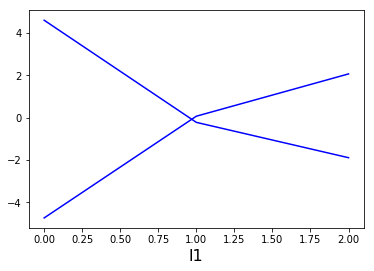

In [82]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(syn0_history[0], ms=3, lw=1.5, color = 'b')
plt.xlabel('l1', fontsize = 16)
plt.show()